## Smart Lead Scoring Engine  

Can you identify the potential leads for a D2C startup?

### Problem Statement  

A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers).   

Leads are captured in 2 ways - Directly and Indirectly.   

Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.  
Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.  

Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.  

### About Dataset

You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.  

#### Data Dictionary  

You are provided with 3 files - train.csv, test.csv and sample_submission.csv  

**Training set**
train.csv contains the leads information of last 1 year from Jan 2021 to Dec 2021. And also the target variable indicating if the user will buy the product in next 3 months or not   
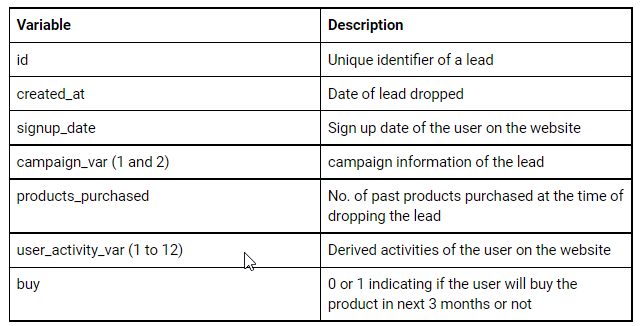

**Test set**
test.csv contains the leads information of the current year from Jan 2022 to March 2022. You need to predict if the lead will buy the product in next 3 months or not.
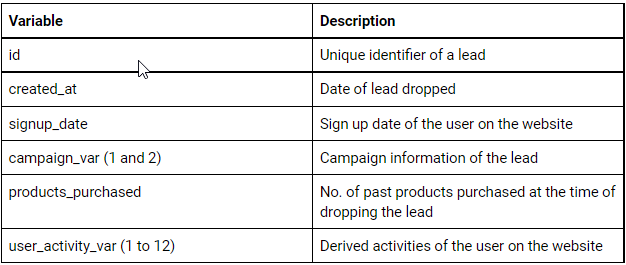  

#### Evaluation metric
The evaluation metric for this hackathon would be **F1 Score of Class 1.**

In [1]:
# Importing necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Reading and Underastanding data

In [2]:
# Read train and test data
df_train = pd.read_csv("train_wn75k28.csv")
df_test = pd.read_csv("test_Wf7sxXF.csv")

# Top 5 datapoints for train
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
# Top 5 datapoints for train
df_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Lets check the shape of the datasets
print('The shape of train dataset is : ',df_train.shape)
print('The shape of test dataset is : ',df_test.shape)

The shape of train dataset is :  (39161, 19)
The shape of test dataset is :  (13184, 18)


In [5]:
# Check if duplicate records are in dataset
print('The duplicate datapoints in train: ', df_train.duplicated().sum())
print('The duplicate datapoints in test: ', df_test.duplicated().sum())

The duplicate datapoints in train:  0
The duplicate datapoints in test:  0


In [6]:
# Checking information on train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [7]:
# Checking information on test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

The date columns are object. So lets convert them to datetime datatype.

In [8]:
# Datatype conversion for train
df_train['created_at'] = pd.to_datetime(df_train['created_at'])
df_train['signup_date'] = pd.to_datetime(df_train['signup_date'])

# Datatype conversion for test 
df_test['created_at'] = pd.to_datetime(df_test['created_at'])
df_test['signup_date'] = pd.to_datetime(df_test['signup_date'])

In [9]:
# Lets check the datatype
print("Datatype verification for train:\n")
print(df_train.dtypes, '\n')
print("Datatype verification for test:\n")
print(df_train.dtypes)

Datatype verification for train:

id                               int64
created_at              datetime64[ns]
campaign_var_1                   int64
campaign_var_2                   int64
products_purchased             float64
signup_date             datetime64[ns]
user_activity_var_1              int64
user_activity_var_2              int64
user_activity_var_3              int64
user_activity_var_4              int64
user_activity_var_5              int64
user_activity_var_6              int64
user_activity_var_7              int64
user_activity_var_8              int64
user_activity_var_9              int64
user_activity_var_10             int64
user_activity_var_11             int64
user_activity_var_12             int64
buy                              int64
dtype: object 

Datatype verification for test:

id                               int64
created_at              datetime64[ns]
campaign_var_1                   int64
campaign_var_2                   int64
products_purchased  

In [10]:
# Statistical summary for train
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39161.0,19581.000000,11304.951283,1.0,9791.0,19581.0,29371.0,39161.0
campaign_var_1,39161.0,6.523812,3.472944,1.0,4.0,6.0,9.0,16.0
campaign_var_2,39161.0,6.452746,2.614296,1.0,5.0,6.0,8.0,15.0
products_purchased,18250.0,2.154137,0.779815,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,39161.0,0.400092,0.509194,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,39161.0,0.006716,0.081676,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,0.102832,0.303743,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,39161.0,0.011465,0.106463,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,39161.0,0.151503,0.359681,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,39161.0,0.499834,0.558166,0.0,0.0,0.0,1.0,3.0


In [11]:
# Statistical summary for test
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,13184.0,45753.500000,3806.037309,39162.0,42457.75,45753.5,49049.25,52345.0
campaign_var_1,13184.0,7.724439,3.599981,1.0,5.00,8.0,10.00,16.0
campaign_var_2,13184.0,7.943416,2.687832,1.0,6.00,8.0,10.00,15.0
products_purchased,5048.0,2.108954,0.783483,1.0,2.00,2.0,3.00,4.0
user_activity_var_1,13184.0,0.386681,0.505653,0.0,0.00,0.0,1.00,3.0
user_activity_var_2,13184.0,0.004248,0.065037,0.0,0.00,0.0,0.00,1.0
user_activity_var_3,13184.0,0.103307,0.304371,0.0,0.00,0.0,0.00,1.0
user_activity_var_4,13184.0,0.007130,0.084140,0.0,0.00,0.0,0.00,1.0
user_activity_var_5,13184.0,0.153064,0.360695,0.0,0.00,0.0,0.00,2.0
user_activity_var_6,13184.0,0.525485,0.565208,0.0,0.00,0.0,1.00,3.0


## Exploratory Data Analysis
### Data Cleaning

In [12]:
# Missing values 
print("Missing values in train: ")
print(df_train.isnull().sum(),'\n')
print("Missing values in test: ")
print(df_test.isnull().sum())

Missing values in train: 
id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64 

Missing values in test: 
id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_va

**Two variables `products_purchased` & `signup_date` have missing values. Let's calculate the missing percentage.**

In [13]:
# Percentage missing values
print("Percent missing values in train: ")
print(100*df_train.isnull().sum()/len(df_train),'\n')
print("Percent missing values in test: ")
print(100*df_test.isnull().sum()/len(df_test))

Percent missing values in train: 
id                       0.000000
created_at               0.000000
campaign_var_1           0.000000
campaign_var_2           0.000000
products_purchased      53.397513
signup_date             38.591966
user_activity_var_1      0.000000
user_activity_var_2      0.000000
user_activity_var_3      0.000000
user_activity_var_4      0.000000
user_activity_var_5      0.000000
user_activity_var_6      0.000000
user_activity_var_7      0.000000
user_activity_var_8      0.000000
user_activity_var_9      0.000000
user_activity_var_10     0.000000
user_activity_var_11     0.000000
user_activity_var_12     0.000000
buy                      0.000000
dtype: float64 

Percent missing values in test: 
id                       0.000000
created_at               0.000000
campaign_var_1           0.000000
campaign_var_2           0.000000
products_purchased      61.711165
signup_date             50.432342
user_activity_var_1      0.000000
user_activity_var_2      0.00000

In [14]:
#Lets drop sign-up date variable
df_train.drop('signup_date',axis=1, inplace=True)
df_test.drop('signup_date',axis=1, inplace=True)

#Also drop id column
df_train.drop('id',axis=1, inplace=True)
df_test.drop('id',axis=1, inplace=True)

### Univariate Analysis

0    0.94898
1    0.05102
Name: buy, dtype: float64 



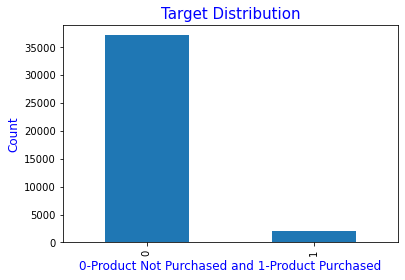

In [15]:
# Lets check distrubution of target variable

# Percentage value counts
print(df_train['buy'].value_counts(normalize=True),'\n')

# Lets plot bar plot for target column
df_train['buy'].value_counts().plot.bar()

# Adding and formatting title
plt.title("Target Distribution", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'blue'})

# Labeling Axes
plt.xlabel("0-Product Not Purchased and 1-Product Purchased", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})

plt.show()

There is very high data imbalace in the dataset. We will take care of this imbalace techniques such as SMOTE.

Lets create **Month** , **weekofyear**, **weekday** and **holiday**

In [16]:
#Lets create new feature such as month, weekday, week of the year
#df_train["weekofyear"] = df_train['created_at'].dt.weekofyear
df_train["month"] = df_train['created_at'].dt.month
# The day of the week with Monday=0, Sunday=6.
df_train["weekday"] = df_train['created_at'].dt.weekday
# Holiday column if day of week is 5 or 6
df_train['holiday'] = df_train["weekday"].apply(lambda x: 'Yes' if x in [5,6] else 'No' )


#Lets create new feature such as month, weekday, week of the year
#df_test["weekofyear"] = df_test['created_at'].dt.weekofyear
df_test["month"] = df_test['created_at'].dt.month
# The day of the week with Monday=0, Sunday=6.
df_test["weekday"] = df_test['created_at'].dt.weekday
# Holiday column if day of week is 5 or 6
df_test['holiday'] = df_test["weekday"].apply(lambda x: 'Yes' if x in [5,6] else 'No' )

In [17]:
# Now drop Created at 
df_train.drop('created_at',axis=1, inplace=True)
df_test.drop('created_at',axis=1, inplace=True)

In [18]:
# top 5 observations
df_train.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,month,weekday,holiday
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,4,No
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,4,No
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4,No
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,No
4,4,6,NaN,0,0,0,0,0,0,1,0,0,0,1,0,0,1,4,No


In [19]:
# Train
# Mapping months
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_train['month'] = df_train['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 
                                           8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Mapping weekday
df_train["weekday"] = df_train["weekday"].map({0:'Sun',1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

#Test
df_test['month'] = df_test['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 
                                           8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

df_test["weekday"] = df_test["weekday"].map({0:'Sun',1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

In [20]:
list1 = df_train.columns.to_list()

In [21]:
# Lets check value counts for all variables
for col in list1:
    print(df_train[col].value_counts(normalize=True))

6     0.103700
5     0.103675
4     0.102602
3     0.096627
7     0.095912
2     0.089017
8     0.087000
9     0.073185
10    0.061081
11    0.047828
1     0.040678
12    0.037154
13    0.027042
14    0.018232
15    0.011644
16    0.004622
Name: campaign_var_1, dtype: float64
6     0.146677
7     0.139731
5     0.134062
8     0.119762
4     0.107582
9     0.090319
3     0.073619
10    0.058681
2     0.045658
11    0.036005
12    0.019433
1     0.015040
13    0.008963
14    0.003856
15    0.000613
Name: campaign_var_2, dtype: float64
2.0    0.485863
3.0    0.275288
1.0    0.199616
4.0    0.039233
Name: products_purchased, dtype: float64
0    0.609509
1    0.380915
2    0.009550
3    0.000026
Name: user_activity_var_1, dtype: float64
0    0.993284
1    0.006716
Name: user_activity_var_2, dtype: float64
0    0.897168
1    0.102832
Name: user_activity_var_3, dtype: float64
0    0.988535
1    0.011465
Name: user_activity_var_4, dtype: float64
0    0.848906
1    0.150686
2    0.000409
Name: 

In [22]:
# Impute missing values in 'products_purchased' by '0' considering customer has not bought any product.
df_train['products_purchased'].fillna(0.0, inplace=True)

# Test missing
df_test['products_purchased'].fillna(0.0, inplace=True)

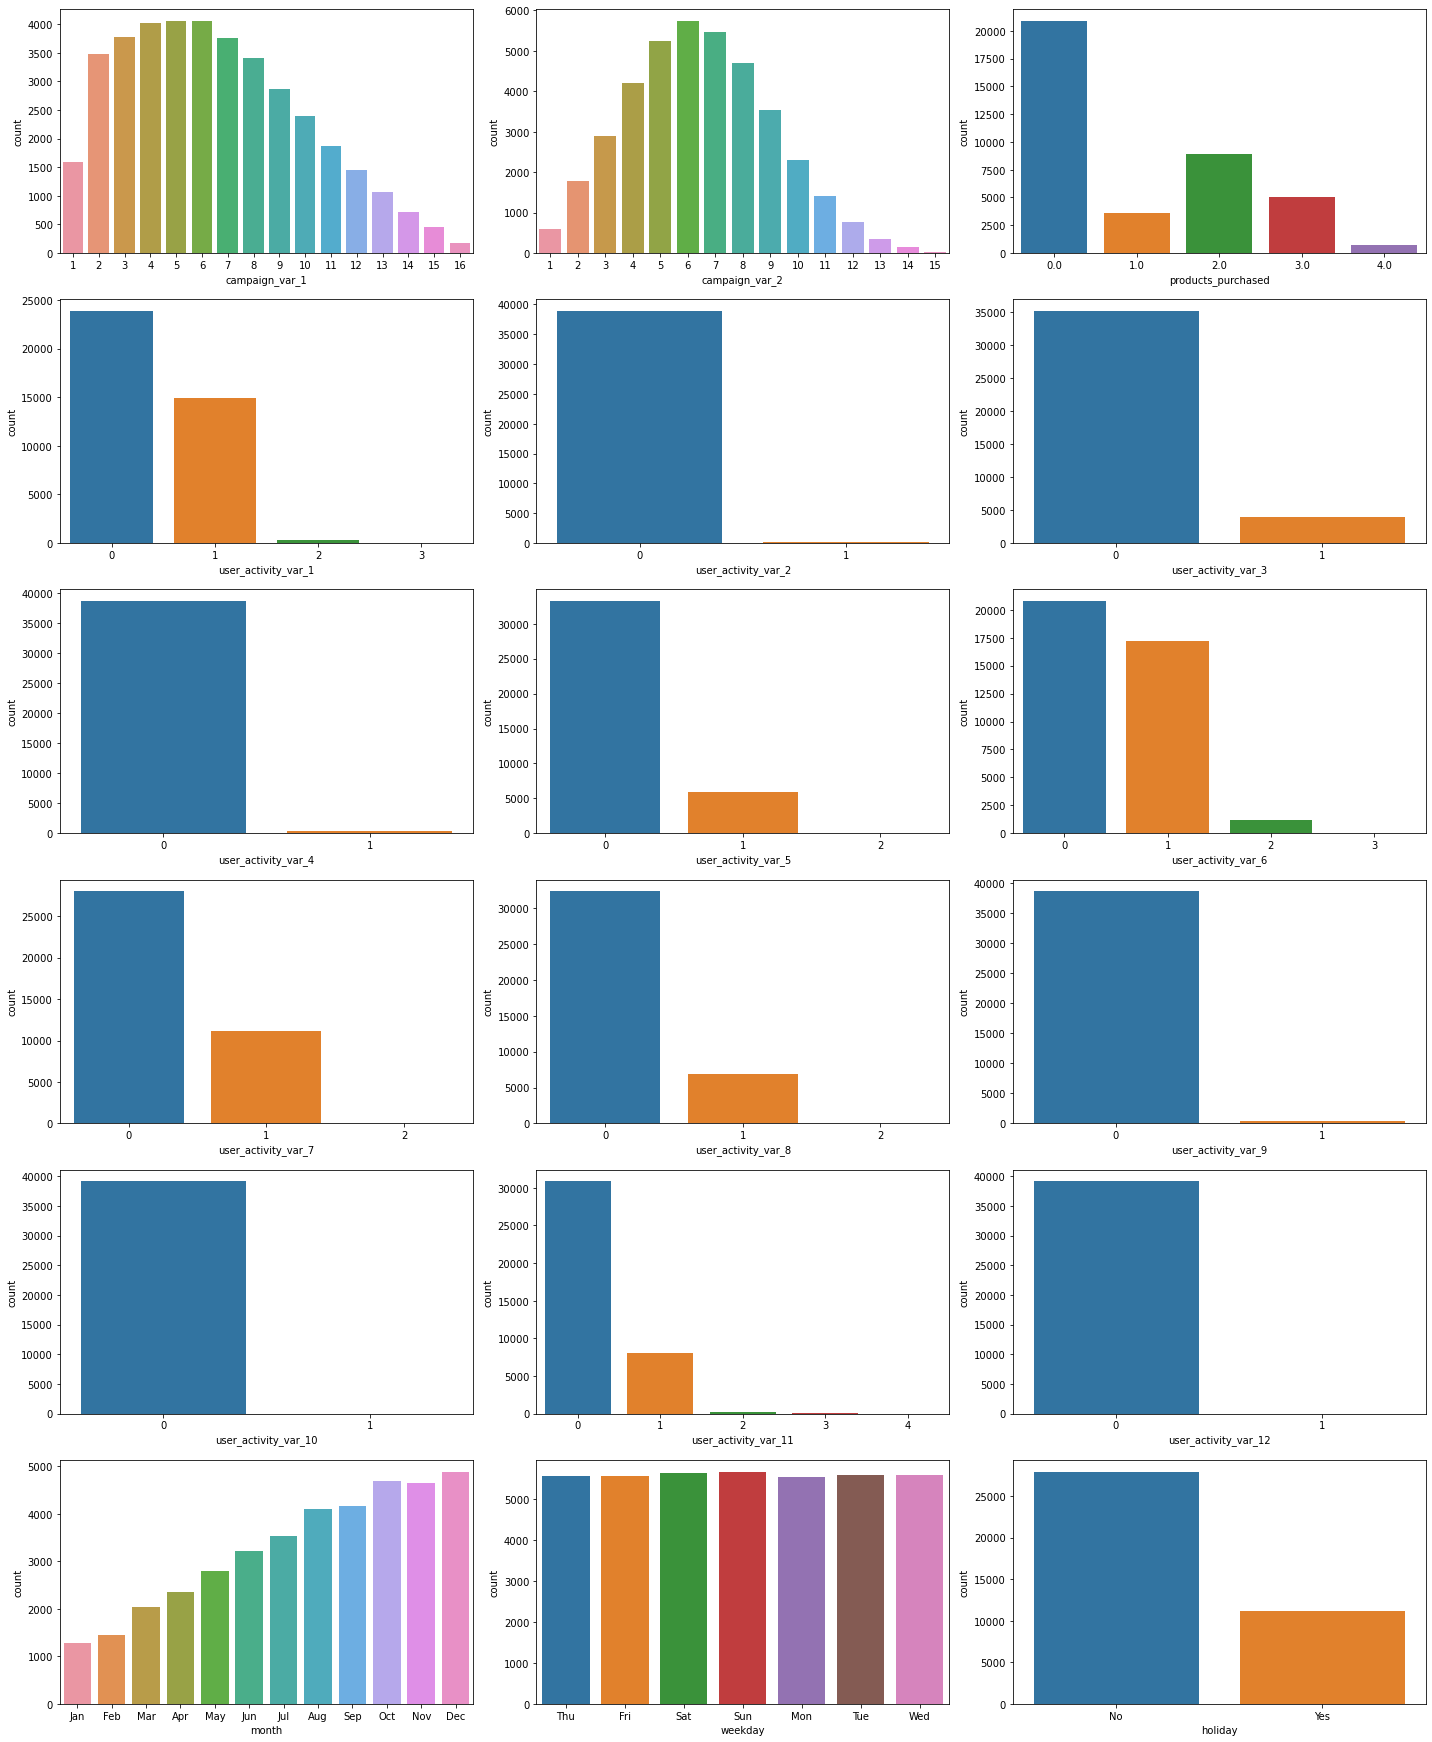

In [23]:
# Create list of categorical variable list.
catvars = ['campaign_var_1',"campaign_var_2",'products_purchased','user_activity_var_1','user_activity_var_2',
           'user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7',
          'user_activity_var_8','user_activity_var_9','user_activity_var_10','user_activity_var_11','user_activity_var_12',
          'month','weekday','holiday']

#Box plot 
fig = plt.figure(figsize=(20,40))
i = 1
for vars in catvars:
    plt.subplot(10,3,i)
    sns.countplot(data = df_train, x = vars)
    i = i + 1

fig.tight_layout()
plt.show()

In [24]:
# Statistical varience in the dataset is very low, we are dropping theses variables
drop_cols = ['user_activity_var_12','user_activity_var_10','user_activity_var_9','user_activity_var_4','user_activity_var_2']

# train drop
df_train.drop(drop_cols, axis=1, inplace=True)

# test drop
df_test.drop(drop_cols, axis=1, inplace=True)

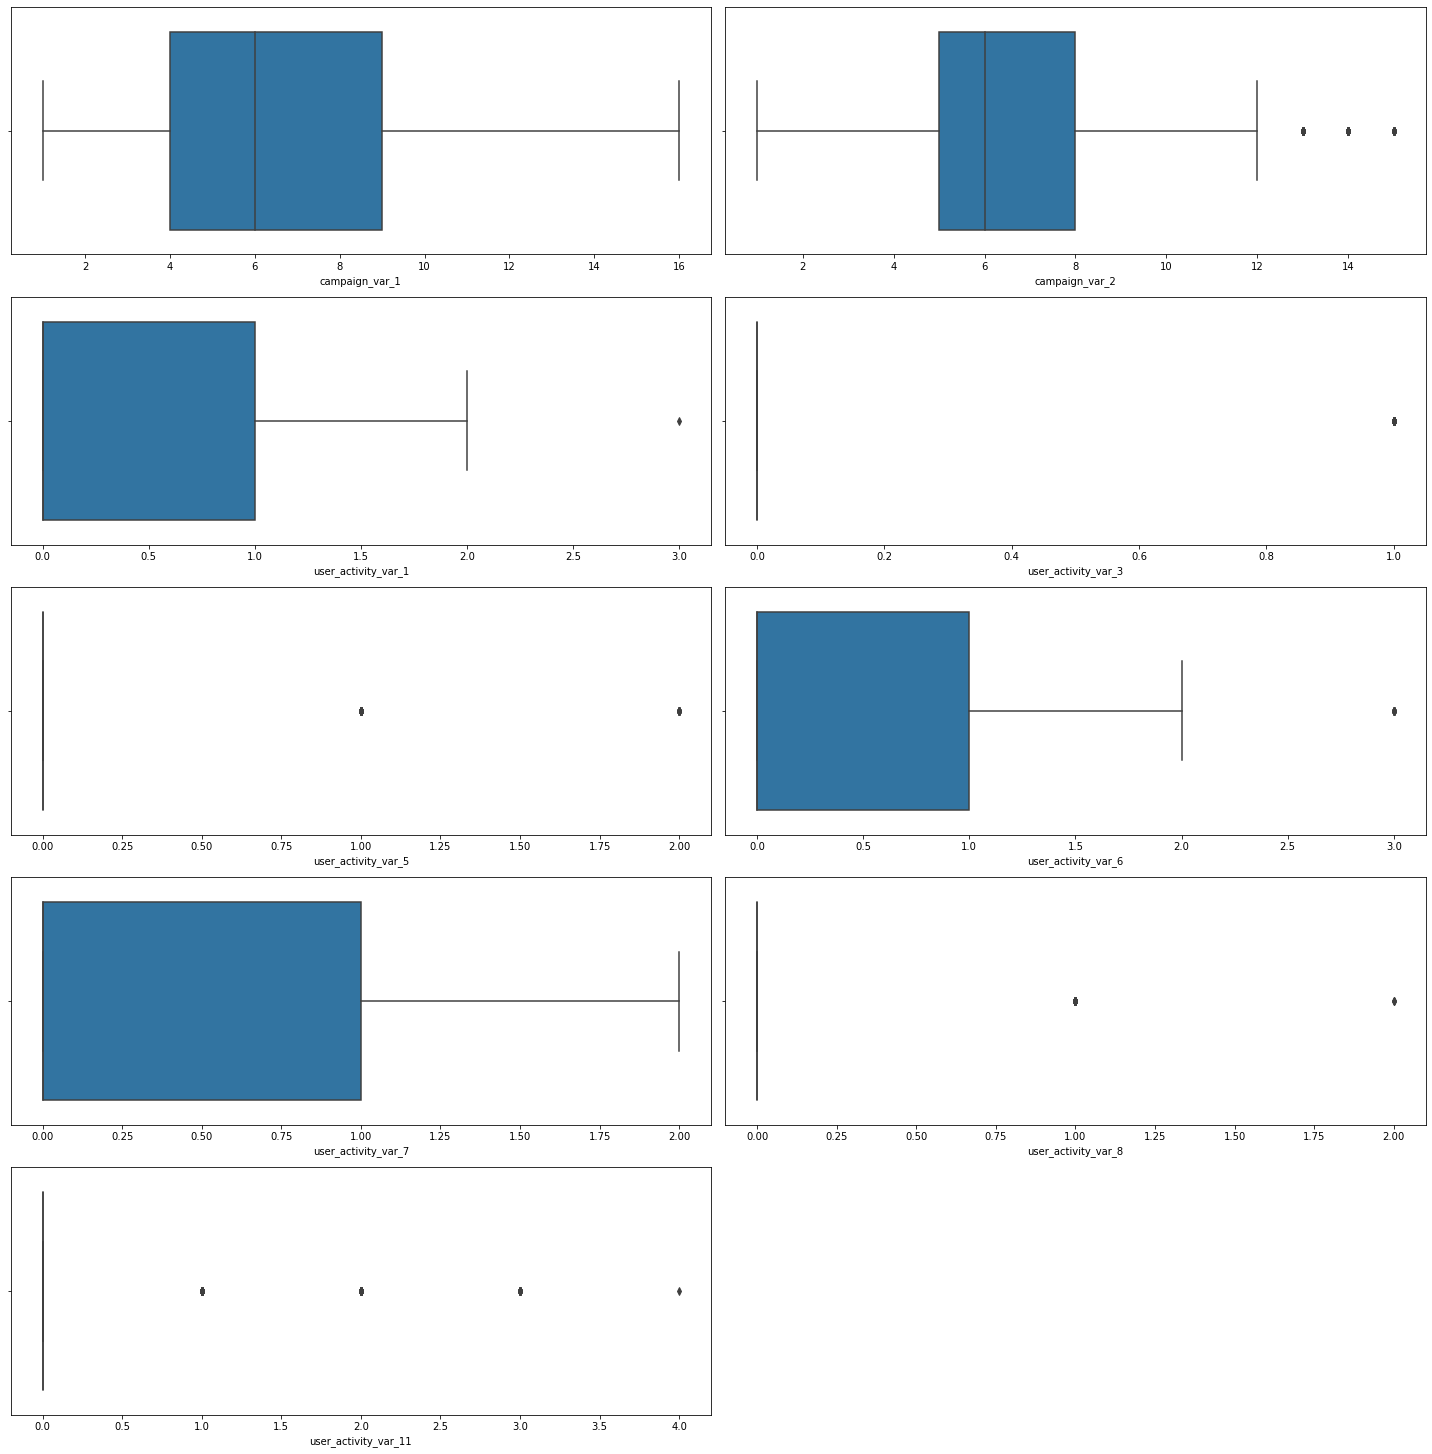

In [25]:
# Create list of categorical variable list.
numvars = ['campaign_var_1','campaign_var_2','user_activity_var_1', 'user_activity_var_3', 'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
           'user_activity_var_8', 'user_activity_var_11']

#Box plot 
fig = plt.figure(figsize=(20,40))
i = 1
for vars in numvars:
    plt.subplot(10,2,i)
    sns.boxplot(data = df_train, x = vars)
    i = i + 1

fig.tight_layout()
plt.show()

In [26]:
catvars = df_train.columns.to_list()
catvars

['campaign_var_1',
 'campaign_var_2',
 'products_purchased',
 'user_activity_var_1',
 'user_activity_var_3',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_11',
 'buy',
 'month',
 'weekday',
 'holiday']

In [27]:
# Also looking at the value counts and graphs above, few categories have very few values, so we would combine them with the other category

### Bivariate Analysis

<AxesSubplot:xlabel='campaign_var_1', ylabel='count'>

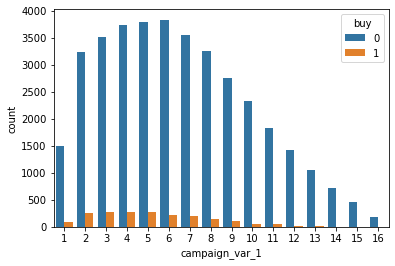

In [28]:
sns.countplot(df_train['campaign_var_1'],hue=df_train['buy'])

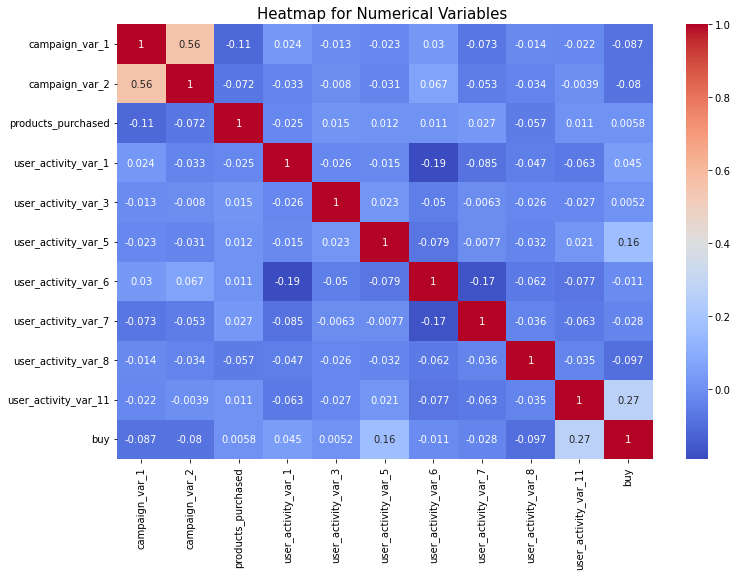

In [29]:
#correlations of numeric values
plt.figure(figsize=(12,8))

# heatmap
sns.heatmap(df_train.corr(), cmap="coolwarm", annot=True)

# Adding and formatting title
plt.title("Heatmap for Numerical Variables ", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

## Model Building

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   campaign_var_2        39161 non-null  int64  
 2   products_purchased    39161 non-null  float64
 3   user_activity_var_1   39161 non-null  int64  
 4   user_activity_var_3   39161 non-null  int64  
 5   user_activity_var_5   39161 non-null  int64  
 6   user_activity_var_6   39161 non-null  int64  
 7   user_activity_var_7   39161 non-null  int64  
 8   user_activity_var_8   39161 non-null  int64  
 9   user_activity_var_11  39161 non-null  int64  
 10  buy                   39161 non-null  int64  
 11  month                 39161 non-null  object 
 12  weekday               39161 non-null  object 
 13  holiday               39161 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 4.2+ MB


In [31]:
cat_cols= df_train.select_dtypes(include=['object']).columns
cat_cols

Index(['month', 'weekday', 'holiday'], dtype='object')

In [32]:
# Lets print the value counts
for col in cat_cols:
    print(df_train[col].value_counts())
    print('='*50)

Dec    4890
Oct    4685
Nov    4658
Sep    4160
Aug    4094
Jul    3540
Jun    3217
May    2799
Apr    2356
Mar    2048
Feb    1442
Jan    1272
Name: month, dtype: int64
Sun    5672
Sat    5630
Wed    5596
Tue    5580
Thu    5572
Fri    5570
Mon    5541
Name: weekday, dtype: int64
No     27961
Yes    11200
Name: holiday, dtype: int64


In [33]:
# Mapping for yes and no
df_train['holiday'] = df_train['holiday'].apply(lambda x : 1 if x=='Yes' else 0)
df_test['holiday'] = df_test['holiday'].apply(lambda x : 1 if x=='Yes' else 0)

In [34]:
# Creating dummy variables for the categorical variables
month_df_train =  pd.get_dummies(df_train['month'], drop_first=True)
week_df_train =  pd.get_dummies(df_train['weekday'], drop_first=True)

month_df_test =  pd.get_dummies(df_test['month'], drop_first=True)
week_df_test =  pd.get_dummies(df_test['weekday'], drop_first=True)

In [35]:
# Concatenating the dummy_vars dataframe to original dataframe
df_train = pd.concat([df_train,month_df_train,week_df_train],axis=1)
df_train.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_3,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_11,buy,month,weekday,holiday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,2,2.0,0,0,0,0,1,1,0,0,Jan,Thu,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,2.0,1,1,0,0,1,0,0,0,Jan,Thu,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,9,3,3.0,1,0,0,0,0,0,0,0,Jan,Thu,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,Jan,Thu,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,6,0.0,0,0,0,0,1,0,1,0,Jan,Thu,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# Concatenating the dummy_vars dataframe to original test dataframe
df_test = pd.concat([df_test,month_df_test,week_df_test],axis=1)
df_test.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_3,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_11,month,weekday,holiday,Jan,Mar,Mon,Sat,Sun,Thu,Tue,Wed
0,2,2,0.0,1,0,0,1,0,0,1,Jan,Fri,1,1,0,0,0,0,0,0,0
1,4,7,3.0,1,0,0,0,0,1,0,Jan,Fri,1,1,0,0,0,0,0,0,0
2,8,7,0.0,0,0,1,1,0,0,0,Jan,Fri,1,1,0,0,0,0,0,0,0
3,9,8,2.0,0,0,1,1,1,0,2,Jan,Fri,1,1,0,0,0,0,0,0,0
4,4,5,2.0,1,0,0,0,0,0,0,Jan,Fri,1,1,0,0,0,0,0,0,0


In [37]:
# Lets drop the original columns from which dummies were created
df_train.drop( [ 'month', 'weekday'],axis=1, inplace=True)
df_test.drop( [ 'month', 'weekday'],axis=1, inplace=True)

#### **Test-Train Split**

In [38]:
#Load required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

import statsmodels.api as sm

In [39]:
# Putting feature variable to X
X = df_train.drop('buy', axis = 1)
X.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_3,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_11,holiday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,2,2.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,2.0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,6,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# Putting response variable to y
y = df_train['buy']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: buy, dtype: int64

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
y_train

13011    0
49       0
4306     0
25780    0
31248    0
        ..
16304    1
79       0
12119    0
14147    0
38408    0
Name: buy, Length: 27412, dtype: int64

**SMOTE for class imbalance**  
As we have checked the imbalance in data. So would take care of data imbalance here.

In [43]:
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [44]:
# Check the shape after Oversampling
print('Shape of train data after oversampling:{}'.format(X_train_smote.shape))
print('Value count of training target variable:\n{}'.format(y_train_smote.value_counts()))

Shape of train data after oversampling:(51932, 28)
Value count of training target variable:
0    25966
1    25966
Name: buy, dtype: int64


In [45]:
y_train_smote

0        0
1        0
2        0
3        0
4        0
        ..
51927    1
51928    1
51929    1
51930    1
51931    1
Name: buy, Length: 51932, dtype: int64

### Logistic Regression

In [46]:
logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(estimator =logreg, n_features_to_select = 15)            
rfe = rfe.fit(X_train_smote, y_train_smote)

In [47]:
list(zip(X_train_smote.columns, rfe.support_, rfe.ranking_))

[('campaign_var_1', False, 12),
 ('campaign_var_2', False, 13),
 ('products_purchased', False, 14),
 ('user_activity_var_1', False, 10),
 ('user_activity_var_3', False, 6),
 ('user_activity_var_5', False, 9),
 ('user_activity_var_6', False, 8),
 ('user_activity_var_7', False, 7),
 ('user_activity_var_8', True, 1),
 ('user_activity_var_11', False, 5),
 ('holiday', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 4),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 11),
 ('Sun', True, 1),
 ('Thu', True, 1),
 ('Tue', True, 1),
 ('Wed', True, 1)]

In [48]:
col = X_train_smote.columns[rfe.support_]
col

Index(['user_activity_var_8', 'holiday', 'Dec', 'Feb', 'Jan', 'Jul', 'Mar',
       'May', 'Nov', 'Sep', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [49]:
y_train_smote = y_train_smote.values.reshape(-1,1)
y_train_smote

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [50]:
#Model1
X_train_sm = sm.add_constant(X_train_smote[col])
logm1 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                51932
Model:                            GLM   Df Residuals:                    51916
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23536.
Date:                Sat, 04 Jun 2022   Deviance:                       47071.
Time:                        16:10:55   Pearson chi2:                 5.00e+04
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  30.4622   1.64e+04      0.002      0.999   -3.22e+04    3.22e+04
user_activity_var_8    -5.2517      0.219    -23.937      0.000      -5.682      -4.822
holiday               -29.6919   1.64e+04     -0.002      0.999   -3.22e+04    3.22e+04
Dec                    -1.7160      0.041    -41.534      0.000      -1.797      -1.635
Feb                    -1.8890      0.079    -23.899      0.000      -2.044      -1.734
Jan                    -2.1188      0.092    -22.911      0.000      -2.300      -1.938
Jul                    -1.6271      0.048    -34.185      0.000      -1.720      -1.534
Mar                    -2.2140      0.076    -29.107      0.000      -2.363      -2.065
May                    -2.3130      0.068    -34.050      0.000      -2.446      -2.180
Nov                    -1.8505      0.044    -42.041      0.000      -1.937      -1.764
Sep                    -1.6413      0.044    -37.529      0.000      -1.727      -1.556
Mon                   -29.8894   1.64e+04     -0.002      0.999   -3.22e+04    3.22e+04
Sun                   -30.0035   1.64e+04     -0.002      0.999   -3.22e+04    3.22e+04
Thu                   -29.8677   1.64e+04     -0.002      0.999   -3.22e+04    3.22e+04
Tue                   -29.9584   1.64e+04     -0.002      0.999   -3.22e+04    3.22e+04
Wed                   -30.0046   1.64e+04     -0.002      0.999   -3.22e+04    3.22e+04
=======================================================================================
"""

In [51]:
#dropping column with high p-value
col = col.drop('Sun',1)

In [52]:
# Model 2
X_train_sm = sm.add_constant(X_train_smote[col])
logm2 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                51932
Model:                            GLM   Df Residuals:                    51917
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27056.
Date:                Sat, 04 Jun 2022   Deviance:                       54112.
Time:                        16:10:55   Pearson chi2:                 5.81e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0487      0.026     79.768      0.000       1.998       2.099
user_activity_var_8    -5.3960      0.194    -27.766      0.000      -5.777      -5.015
holiday                -1.3218      0.030    -43.976      0.000      -1.381      -1.263
Dec                    -1.5451      0.036    -42.360      0.000      -1.617      -1.474
Feb                    -1.9049      0.075    -25.325      0.000      -2.052      -1.757
Jan                    -2.0388      0.082    -24.805      0.000      -2.200      -1.878
Jul                    -1.4457      0.042    -34.703      0.000      -1.527      -1.364
Mar                    -2.0532      0.063    -32.339      0.000      -2.178      -1.929
May                    -2.1932      0.057    -38.674      0.000      -2.304      -2.082
Nov                    -1.8081      0.040    -45.148      0.000      -1.887      -1.730
Sep                    -1.5267      0.039    -38.794      0.000      -1.604      -1.450
Mon                    -1.5172      0.037    -40.811      0.000      -1.590      -1.444
Thu                    -1.5001      0.037    -40.660      0.000      -1.572      -1.428
Tue                    -1.5936      0.038    -42.200      0.000      -1.668      -1.520
Wed                    -1.6382      0.038    -43.389      0.000      -1.712      -1.564
=======================================================================================
"""

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,1.19
0,user_activity_var_8,1.13
2,Dec,1.12
8,Nov,1.11
12,Tue,1.11
13,Wed,1.11
9,Sep,1.10
11,Thu,1.10
10,Mon,1.09
5,Jul,1.08


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [54]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.629832
1    0.212165
2    0.162101
3    0.007097
4    0.198206
5    0.190028
6    0.627598
7    0.246711
8    0.289634
9    0.633803
dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.6298325 , 0.21216468, 0.16210051, 0.00709733, 0.19820633,
       0.19002766, 0.62759795, 0.24671105, 0.28963435, 0.63380327])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [56]:
# y_train_pred_final = pd.DataFrame({'Buy':y_train_smote.reshape(-1), 'Buy_prob':y_train_pred})
# y_train_pred_final['buy'] = y_train_smote.index
# y_train_pred_final.head()

In [57]:
# y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# # Let's see the head
# y_train_pred_final.head()

### Logistic Regression Model

In [58]:
def peformance_On_data(model,y_test,y_test_pred,pred_prob):
    
    print("The Model name : {}".format(model),'\n')
    print('classification Report:\n', metrics.classification_report(y_test, y_test_pred))
    
    #roc auc Score
    print("roc_auc Score : {} ".format(metrics.roc_auc_score(y_test, pred_prob)))
    
    #return a DataFrame with all the score
    return pd.DataFrame({"Model":[model],
                         "precision":[metrics.precision_score(y_test,y_test_pred)],
                         "recall":[metrics.recall_score(y_test,y_test_pred)],
                         "f1_score":[metrics.f1_score(y_test,y_test_pred)],
                         "roc_auc":[metrics.roc_auc_score(y_test,pred_prob)]})   
    
    
def plot_roc_auc(model, X_test, y_test):    
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.title("AUC ROC Curve", color='r', fontsize=12)
    plt.show()

In [59]:
# Creating a DataFrame for storing all test score for models and would be helpful for analysis
score_df = pd.DataFrame({"Model":[None],
                         "precision":[None],
                         "recall":[None],
                         "f1_score":[None],
                         "roc_auc":[None]})

In [60]:
#Copying the previous dataframes in new df for logistic regression model
X_train_lr = X_train_smote.copy()
y_train_lr = y_train_smote.copy()
X_test_lr = X_test.copy()
y_test_lr = y_test.copy()

In [61]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

# Fitting the data
lr_model.fit(X_train_lr, y_train_lr)

# Probabilities on train data
y_train_pred_lr_prob_train = lr_model.predict_proba(X_train_lr)

# Prediction on train data
y_train_pred_lr = lr_model.predict(X_train_lr)

# Prediction on test data
y_test_pred_lr = lr_model.predict(X_test_lr)

In [62]:
print(' Train F1 score:',metrics.f1_score(y_train_lr, y_train_pred_lr))
print(' Test F1 score:',metrics.f1_score(y_test_lr, y_test_pred_lr))

 Train F1 score: 0.8792940061596778
 Test F1 score: 0.23172712506767731


In [63]:
# Choosing buy==1 probabilities for training
y_train_pred_lr_prob_train = y_train_pred_lr_prob_train[:,1]
y_train_pred_lr_prob_train

array([0.06907295, 0.06500004, 0.09822891, ..., 0.99888482, 0.83082528,
       0.94622251])

In [64]:
#Making predictions on test set 
y_test_pred_lr_prob_test = lr_model.predict_proba(X_test_lr)

# Choosing only churner probabilities
y_test_pred_lr_prob_test = y_test_pred_lr_prob_test[:,1]
y_test_pred_lr_prob_test

array([0.54305422, 0.64878998, 0.16004945, ..., 0.43762184, 0.24275247,
       0.36475116])

In [65]:
from sklearn.metrics import plot_roc_curve

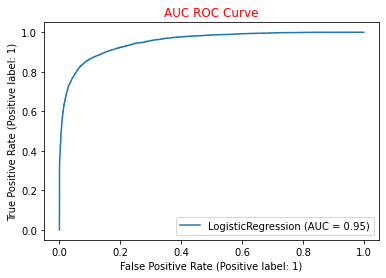

In [66]:
#Roc curve on train data
plot_roc_auc(lr_model, X_train_lr, y_train_lr)

In [67]:
#Lets check the performance on train data and plot ROC AUC curve.
print('performance on train data:')
peformance_On_data('Logistic Regression', y_train_lr, y_train_pred_lr,y_train_pred_lr_prob_train)

performance on train data:
The Model name : Logistic Regression 

classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89     25966
           1       0.90      0.86      0.88     25966

    accuracy                           0.88     51932
   macro avg       0.88      0.88      0.88     51932
weighted avg       0.88      0.88      0.88     51932

roc_auc Score : 0.9516357639641204 


,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.90209,0.857622,0.879294,0.951636


In [68]:
#Lets check the performance on test data and plot ROC AUC curve.
print("performance on test data :")
df1 = peformance_On_data('Logistic Regression', y_test_lr, y_test_pred_lr,y_test_pred_lr_prob_test)

performance on test data :
The Model name : Logistic Regression 

classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     11197
           1       0.17      0.39      0.23       552

    accuracy                           0.88     11749
   macro avg       0.57      0.65      0.58     11749
weighted avg       0.93      0.88      0.90     11749

roc_auc Score : 0.7584779437556385 


In [69]:
#Add the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df = score_df.append(df1)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.165251,0.387681,0.231727,0.758478


<Figure size 2000x1000 with 0 Axes>

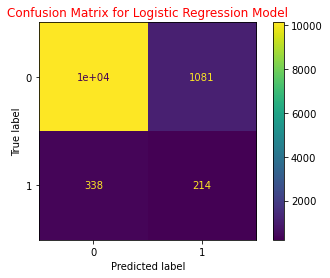

In [70]:
#visualize confusion matrix
plt.figure(figsize=(20,10), dpi=100)
metrics.plot_confusion_matrix(lr_model, X_test_lr, y_test_lr)
plt.title('Confusion Matrix for Logistic Regression Model', color='r', fontsize=12)
plt.show()

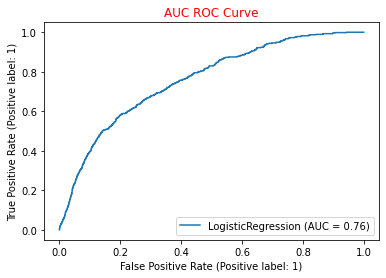

In [71]:
#Roc curve on test data
plot_roc_auc(lr_model, X_test_lr, y_test_lr)

### Decision Tree Model 

In [72]:
#X_train, X_test for Decision Tree
X_train_dt = X_train_smote.copy()
y_train_dt = y_train_smote.copy()
X_test_dt = X_test.copy()
y_test_dt = y_test.copy()

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Instanstiate the object of class Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42,max_depth=6)

# Fitting the data
dt.fit(X_train_dt, y_train_dt)

# Probability of train data
y_train_pred_dt = dt.predict(X_train_dt)

# Prediction of test data
y_test_pred_dt = dt.predict(X_test_dt)

# Train Probabilities
pred_prob_dt_train = dt.predict_proba(X_train_dt)

# Test Probabilities
pred_prob_dt_test = dt.predict_proba(X_test_dt)

In [74]:
# Train Probabilities
pred_prob_dt_train = pred_prob_dt_train[:,1]
pred_prob_dt_train

array([0.15983027, 0.54094579, 0.30978934, ..., 0.84837575, 0.27207977,
       0.48339741])

In [75]:
# Test Probabilities
pred_prob_dt_test = pred_prob_dt_test[:,1]
pred_prob_dt_test

array([0.84837575, 0.10897833, 0.64892086, ..., 0.10897833, 0.22608696,
       0.84837575])

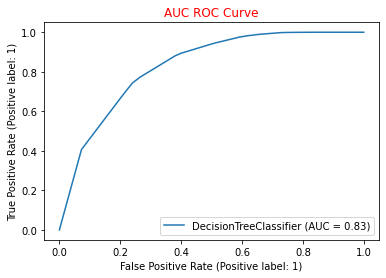

In [76]:
# AUC ROC score plotting for train
plot_roc_auc(dt,X_train_dt,y_train_smote)

In [77]:
#Lets check the performance on train data and plot ROC AUC curve.
print('performance on train data:')
peformance_On_data('Decision Tree', y_train_dt, y_train_pred_dt, pred_prob_dt_train)

performance on train data:
The Model name : Decision Tree 

classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75     25966
           1       0.74      0.77      0.76     25966

    accuracy                           0.75     51932
   macro avg       0.75      0.75      0.75     51932
weighted avg       0.75      0.75      0.75     51932

roc_auc Score : 0.8293611987542184 


,Model,precision,recall,f1_score,roc_auc
0,Decision Tree,0.744194,0.773743,0.758681,0.829361


In [78]:
#Lets check the performance on test data and plot ROC AUC curve.
df2 = peformance_On_data('Decision Tree', y_test_dt, y_test_pred_dt, pred_prob_dt_test)

The Model name : Decision Tree 

classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83     11197
           1       0.10      0.64      0.18       552

    accuracy                           0.72     11749
   macro avg       0.54      0.68      0.51     11749
weighted avg       0.94      0.72      0.80     11749

roc_auc Score : 0.7470125764794658 


In [79]:
#Add the score to dataframe for comparision with other model performance
score_df = score_df.append(df2)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.165251,0.387681,0.231727,0.758478
0,Decision Tree,0.104210,0.641304,0.179286,0.747013


<Figure size 1000x1000 with 0 Axes>

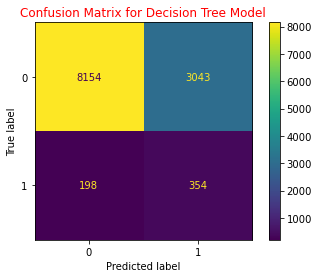

In [80]:
#visualize confusion matrix
plt.figure(figsize=(10,10), dpi=100)
metrics.plot_confusion_matrix(dt, X_test_dt, y_test_dt)
plt.title('Confusion Matrix for Decision Tree Model', color='r', fontsize=12)
plt.show()

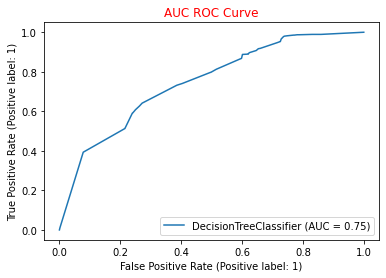

In [81]:
# AUC ROC score plotting
plot_roc_auc(dt,X_test_dt,y_test_dt)

#### Hyper-parameter tuning for the Decision Tree

In [82]:
# Instanstiate the object from Decision Tree Classifier 
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameters for tuning the model
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
    'min_samples_split':[3,4,5,10,15,20,50]
}

# grid search cv Object
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring='f1'
                           )

In [83]:
# Fitting the grid search object on train data
# import time
# %%time
grid_search.fit(X_train_dt, y_train_dt)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500],
                         'min_samples_split': [3, 4, 5, 10, 15, 20, 50]},
             scoring='f1', verbose=1)

In [84]:
# Best score
grid_search.best_score_

0.8982132401621818

In [85]:
# Best Decision tree after tuning
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=3,
                       random_state=42)

In [86]:
# Prediction on train data
y_train_pred_dt_tune = dt_best.predict(X_train_dt)

# Prediction on test data
y_test_pred_dt_tune = dt_best.predict(X_test_dt)

# Train Probabilities
pred_prob_dt_tune_train = dt_best.predict_proba(X_train_dt)

# Test Probabilities
pred_prob_dt_tune_test = dt_best.predict_proba(X_test_dt)

In [87]:
# Train Probabilities
pred_prob_dt_tune_train =pred_prob_dt_tune_train[:,0]
pred_prob_dt_tune_train

array([1.        , 0.17431193, 1.        , ..., 0.        , 0.07692308,
       0.22969188])

In [88]:
# Test Probabilities
pred_prob_dt_tune_test = pred_prob_dt_tune_test[:,0]
pred_prob_dt_tune_test

array([0.35294118, 0.18103448, 0.77777778, ..., 1.        , 1.        ,
       0.3276699 ])

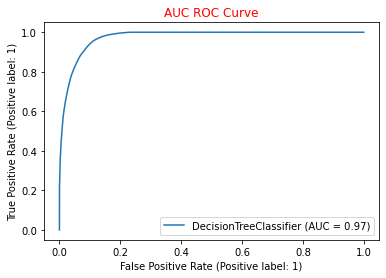

In [89]:
# Plotting AUV ROC score
plot_roc_auc(dt_best,X_train_dt,y_train_dt)

In [90]:
#Lets check the performance on train data and plot ROC AUC curve.
print("performance on train data:")
peformance_On_data('Decision Tree Tuned', y_train_dt, y_train_pred_dt_tune,pred_prob_dt_tune_train)

performance on train data:
The Model name : Decision Tree Tuned 

classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     25966
           1       0.90      0.96      0.92     25966

    accuracy                           0.92     51932
   macro avg       0.92      0.92      0.92     51932
weighted avg       0.92      0.92      0.92     51932

roc_auc Score : 0.025018622044745597 


,Model,precision,recall,f1_score,roc_auc
0,Decision Tree Tuned,0.895357,0.956597,0.924965,0.025019


In [91]:
#Lets check the performance on test data and plot ROC AUC curve.
print('performance on test data:')
df3 = peformance_On_data('Decision Tree Tuned', y_test_dt, y_test_pred_dt_tune,pred_prob_dt_tune_test)

performance on test data:
The Model name : Decision Tree Tuned 

classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91     11197
           1       0.12      0.38      0.18       552

    accuracy                           0.84     11749
   macro avg       0.54      0.62      0.54     11749
weighted avg       0.93      0.84      0.88     11749

roc_auc Score : 0.3117390074722396 


In [92]:
#Add the score to dataframe for comparision with other model performance
score_df = score_df.append(df3)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.165251,0.387681,0.231727,0.758478
0,Decision Tree,0.104210,0.641304,0.179286,0.747013
0,Decision Tree Tuned,0.117347,0.375000,0.178756,0.311739


<Figure size 1000x1000 with 0 Axes>

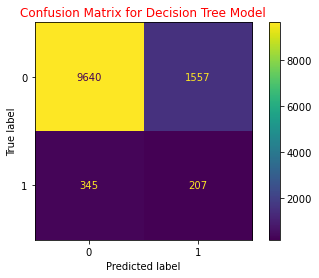

In [93]:
#visualize confusion matrix
plt.figure(figsize=(10,10), dpi=100)
metrics.plot_confusion_matrix(dt_best, X_test_dt, y_test_dt)
plt.title('Confusion Matrix for Decision Tree Model', color='r', fontsize=12)
plt.show()

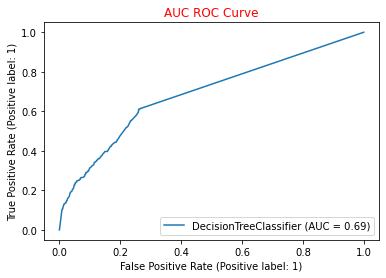

In [94]:
# Plotting AUV ROC score
plot_roc_auc(dt_best,X_test_dt,y_test_dt)

### Random Forest Model

In [95]:
#X_train, X_test for random Forest
X_train_rf = X_train_smote.copy()
y_train_rf = y_train_smote.copy()
X_test_rf = X_test.copy()
y_test_rf = y_test.copy()

In [96]:
#Instantiate RandomForest, train with default parameters
rf = RandomForestClassifier(n_jobs=-1)

#Fitting the model on train data
rf.fit(X_train_rf, y_train_rf)

#Prediction on train
y_train_pred_rf = rf.predict(X_train_rf)

# Train Probabilities
pred_prob_rf_train = rf.predict_proba(X_train_rf)

#Prediction on test
y_test_pred_rf = rf.predict(X_test_rf)

# Test Probabilities
pred_prob_rf_test = rf.predict_proba(X_test_rf)

In [97]:
# Getting probabilities of the Churners
pred_prob_rf_test = pred_prob_rf_test[:,1]
pred_prob_rf_test

array([0.28      , 0.5       , 0.26      , ..., 0.0995671 , 0.2       ,
       0.31066667])

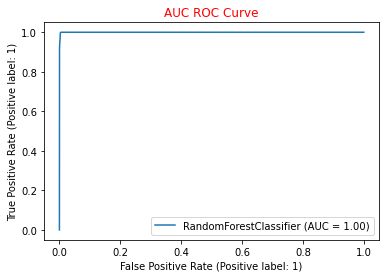

In [98]:
#plot roc auc curve
plot_roc_auc(rf,X_train_rf, y_train_rf)

In [99]:
#Lets check the performance on train data and plot ROC AUC curve.
print('performance on train data:')
peformance_On_data('Random Forest',y_train_rf,y_train_pred_rf,pred_prob_rf_train[:,1])

performance on train data:
The Model name : Random Forest 

classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25966
           1       1.00      1.00      1.00     25966

    accuracy                           1.00     51932
   macro avg       1.00      1.00      1.00     51932
weighted avg       1.00      1.00      1.00     51932

roc_auc Score : 0.9998534831769679 


,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.995893,0.999307,0.997597,0.999853


In [100]:
#Lets check the performance on test data and plot ROC AUC curve.
print('performance on test data:')
df4 = peformance_On_data('Random Forest',y_test_rf,y_test_pred_rf,pred_prob_rf_test)

performance on test data:
The Model name : Random Forest 

classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     11197
           1       0.22      0.23      0.23       552

    accuracy                           0.93     11749
   macro avg       0.59      0.60      0.59     11749
weighted avg       0.93      0.93      0.93     11749

roc_auc Score : 0.7824684212774383 


In [101]:
#Add the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df = score_df.append(df4)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.165251,0.387681,0.231727,0.758478
0,Decision Tree,0.104210,0.641304,0.179286,0.747013
0,Decision Tree Tuned,0.117347,0.375000,0.178756,0.311739
0,Random Forest,0.220310,0.231884,0.225949,0.782468


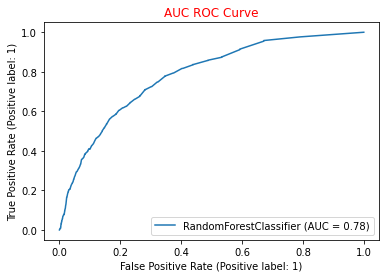

In [102]:
#plot roc auc curve
plot_roc_auc(rf,X_test_rf, y_test_rf)

<Figure size 600x600 with 0 Axes>

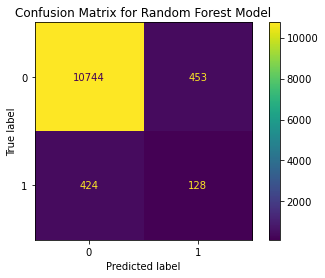

In [103]:
#visualize confusion matrix
plt.figure(figsize=(6,6), dpi=100)
metrics.plot_confusion_matrix(rf, X_test_rf, y_test_rf)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#### Hyperparamter tuning using GridsearchCv

In [104]:
from sklearn.model_selection import GridSearchCV

# Instanstiate the random forest object
rf = RandomForestClassifier(random_state=42)

# Lets define hyperparameter for tuning
params = {
    'max_depth': [2,3,5,10,15,20],
    'min_samples_leaf': [5,10,20,25,50,75,100,150,200],
    'n_estimators': [10, 25, 50, 75,100]
}

# Instanstiate gridsearchcv object
grid_search = GridSearchCV(estimator=rf,                           
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, 
                           verbose=1,
                           scoring = 'f1'
                          )

In [105]:
# Lets fit the model on data
grid_search.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 25, 50, 75, 100, 150,
                                              200],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='f1', verbose=1)

In [106]:
#Best Score   
grid_search.best_score_

0.9240361629178591

In [107]:
# Best esttimator for random forest
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [108]:
# Prediction on train
y_train_pred_rf_tune = rf_best.predict(X_train_rf)

# Prediction on test
y_test_pred_rf_tune = rf_best.predict(X_test_rf)

# Train Probabilities
pred_prob_rf_tune_train = rf_best.predict_proba(X_train_rf)

# Test Probabilities
pred_prob_rf_tune_test = rf_best.predict_proba(X_test_rf)

In [109]:
# Choosing the churners probabilities only for train data
pred_prob_rf_tune_train = pred_prob_rf_tune_train[:,1]
pred_prob_rf_tune_train

array([0.11773407, 0.28034145, 0.19805499, ..., 0.9469447 , 0.74854818,
       0.80328407])

In [110]:
# Choosing the churners probabilities only for test data
pred_prob_rf_tune_test = pred_prob_rf_tune_test[:,1]
pred_prob_rf_tune_test

array([0.58188497, 0.53237697, 0.40015588, ..., 0.27700332, 0.26385864,
       0.59319393])

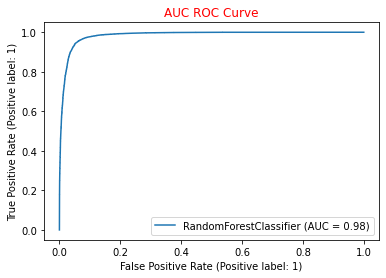

In [111]:
#plot roc auc curve
plot_roc_auc(rf_best,X_train_rf,y_train_rf)

In [112]:
#Lets check the performance on train data and plot ROC AUC curve.
print('performance on train data')
peformance_On_data('Random Forest',y_train_rf,y_train_pred_rf_tune,pred_prob_rf_tune_train)

performance on train data
The Model name : Random Forest 

classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     25966
           1       0.92      0.97      0.94     25966

    accuracy                           0.94     51932
   macro avg       0.94      0.94      0.94     51932
weighted avg       0.94      0.94      0.94     51932

roc_auc Score : 0.984465605248283 


,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.919363,0.971694,0.944804,0.984466


In [113]:
#Lets check the performance on test data and plot ROC AUC curve.
print('performance on test data:')
df5 = peformance_On_data('Random Forest Tuned',y_test_rf,y_test_pred_rf_tune,pred_prob_rf_tune_test)

performance on test data:
The Model name : Random Forest Tuned 

classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     11197
           1       0.17      0.44      0.25       552

    accuracy                           0.87     11749
   macro avg       0.57      0.67      0.59     11749
weighted avg       0.93      0.87      0.90     11749

roc_auc Score : 0.7871250613194787 


<Figure size 1000x1000 with 0 Axes>

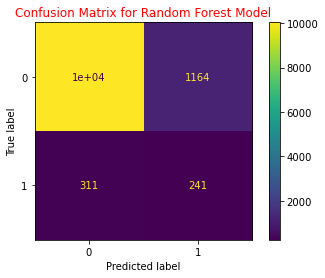

In [114]:
#visualize confusion matrix
plt.figure(figsize=(10,10), dpi=100)
metrics.plot_confusion_matrix(rf_best, X_test_rf, y_test_rf)
plt.title('Confusion Matrix for Random Forest Model', color='r', fontsize=12)
plt.show()

In [115]:
#Adding the score to dataframe for comparision with other model performance
score_df = score_df.append(df5)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.165251,0.387681,0.231727,0.758478
0,Decision Tree,0.104210,0.641304,0.179286,0.747013
0,Decision Tree Tuned,0.117347,0.375000,0.178756,0.311739
0,Random Forest,0.220310,0.231884,0.225949,0.782468
0,Random Forest Tuned,0.171530,0.436594,0.246295,0.787125


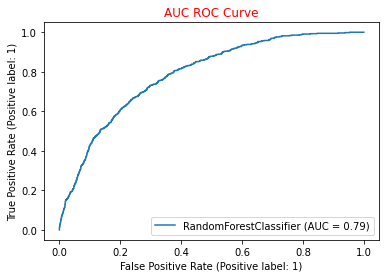

In [116]:
#plot roc auc curve
plot_roc_auc(rf_best,X_test_rf,y_test_rf)

### GradientBoosting Model

In [117]:
#X_train, X_test for GB
X_train_xgb = X_train_smote.copy()
y_train_xgb = y_train_smote.copy()
X_test_xgb = X_test.copy()
y_test_xgb = y_test.copy()

In [118]:
# Instanstiate the object of class Decision Tree Classifier
xgboost = GradientBoostingClassifier(random_state=42)

# Fitting the data
xgboost.fit(X_train_xgb, y_train_smote)

# Prediction of train data
y_train_pred_xgb = xgboost.predict(X_train_xgb)

# Prediction of test data
y_test_pred_xgb = xgboost.predict(X_test_xgb)

# Train Probabilities
pred_prob_xgb_train = xgboost.predict_proba(X_train_xgb)

# Test Probabilities
pred_prob_xgb_test = xgboost.predict_proba(X_test_xgb)

In [119]:
# Train Probabilities
pred_prob_xgb_train = pred_prob_xgb_train[:,1]
pred_prob_xgb_train

array([0.18638885, 0.34599989, 0.22193313, ..., 0.85426604, 0.49641162,
       0.71926834])

In [120]:
# Test Probabilities
pred_prob_xgb_test = pred_prob_xgb_test[:,1]
pred_prob_xgb_test

array([0.69154849, 0.50929016, 0.45114802, ..., 0.4243225 , 0.28507629,
       0.68841161])

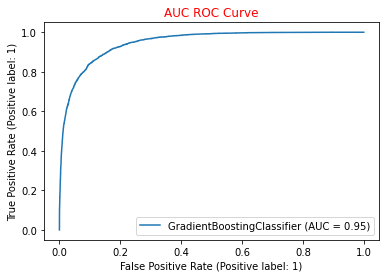

In [121]:
# AUC ROC score plotting
plot_roc_auc(xgboost,X_train_xgb,y_train_xgb)

In [122]:
#Lets check the performance on train data and plot ROC AUC curve.
print('performance on train data')
peformance_On_data('Gradient Boosting', y_train_xgb, y_train_pred_xgb, pred_prob_xgb_train)

performance on train data
The Model name : Gradient Boosting 

classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     25966
           1       0.85      0.90      0.87     25966

    accuracy                           0.87     51932
   macro avg       0.87      0.87      0.87     51932
weighted avg       0.87      0.87      0.87     51932

roc_auc Score : 0.9482818752093526 


,Model,precision,recall,f1_score,roc_auc
0,Gradient Boosting,0.849887,0.901602,0.874981,0.948282


In [123]:
#Lets check the performance on test data and plot ROC AUC curve.
df6 = peformance_On_data('Gradient Boosting', y_test_xgb, y_test_pred_xgb, pred_prob_xgb_test)

The Model name : Gradient Boosting 

classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11197
           1       0.14      0.54      0.22       552

    accuracy                           0.82     11749
   macro avg       0.56      0.69      0.56     11749
weighted avg       0.93      0.82      0.87     11749

roc_auc Score : 0.7868543010356034 


In [124]:
#Add the score to dataframe for comparision with other model performance
score_df = score_df.append(df6)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.165251,0.387681,0.231727,0.758478
0,Decision Tree,0.104210,0.641304,0.179286,0.747013
0,Decision Tree Tuned,0.117347,0.375000,0.178756,0.311739
0,Random Forest,0.220310,0.231884,0.225949,0.782468
0,Random Forest Tuned,0.171530,0.436594,0.246295,0.787125
0,Gradient Boosting,0.139831,0.538043,0.221973,0.786854


<Figure size 1000x1000 with 0 Axes>

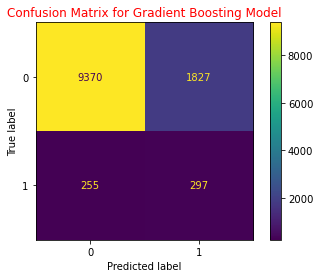

In [125]:
#visualize confusion matrix
plt.figure(figsize=(10,10), dpi=100)
metrics.plot_confusion_matrix(xgboost, X_test_xgb, y_test_xgb)
plt.title('Confusion Matrix for Gradient Boosting Model', color='r', fontsize=12)
plt.show()

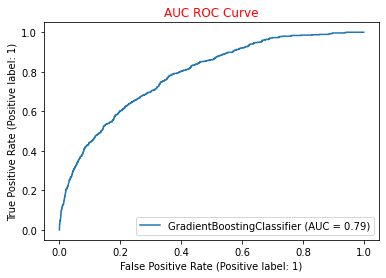

In [126]:
# AUC ROC score plotting
plot_roc_auc(xgboost,X_test_xgb,y_test_xgb)